In [1]:
import pandas as pd
import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data=pd.read_csv('LCL-June2015v2_15.csv')
for i in range(16,30):
    path_i='LCL-June2015v2_'+str(i)+'.csv'
    data_i=pd.read_csv(path_i)
    data=pd.concat([data,data_i])

In [3]:
data.shape

(15000000, 4)

In [4]:
data_i.shape

(1000000, 4)

In [5]:
compteurs=len(data.groupby('LCLid').nunique())

In [6]:
compteurs

483

In [236]:
data.head()

,LCLid,DateTime,KWhh,year,month,day,hour,minute,season,season_encoded,period,period_enc,Weekday
0,MAC000515,2012-07-10 14:30:00,0.028,2012,7,10,14,30,summer,1,early_evening,3,Tuesday
1,MAC000515,2012-07-10 15:00:00,0.027,2012,7,10,15,0,summer,1,early_evening,3,Tuesday
2,MAC000515,2012-07-10 15:30:00,0.026,2012,7,10,15,30,summer,1,early_evening,3,Tuesday
3,MAC000515,2012-07-10 16:00:00,0.025,2012,7,10,16,0,summer,1,early_evening,3,Tuesday
4,MAC000515,2012-07-10 16:30:00,0.075,2012,7,10,16,30,summer,1,early_evening,3,Tuesday


In [8]:
del data['stdorToU']

In [10]:
data

,LCLid,DateTime,KWH/hh (per half hour)
0,MAC000515,2012-07-10 14:30:00.0000000,0.028
1,MAC000515,2012-07-10 15:00:00.0000000,0.027
2,MAC000515,2012-07-10 15:30:00.0000000,0.026
3,MAC000515,2012-07-10 16:00:00.0000000,0.025
4,MAC000515,2012-07-10 16:30:00.0000000,0.075
...,...,...,...
999995,MAC001140,2013-06-11 15:30:00.0000000,0.162
999996,MAC001140,2013-06-11 16:00:00.0000000,0.116
999997,MAC001140,2013-06-11 16:30:00.0000000,0.09
999998,MAC001140,2013-06-11 17:00:00.0000000,0.06


In [11]:
data.isnull().sum().any()

False

In [12]:
data.describe(include = 'all')

,LCLid,DateTime,KWH/hh (per half hour)
count,15000000,15000000,15000000
unique,483,33804,4000
top,MAC000516,2012-11-20 00:00:00.0000000,0
freq,33746,966,145427


In [13]:
data.duplicated().any()

True

In [14]:
data.drop_duplicates(inplace=True)

In [15]:
data=data.reset_index()

In [16]:
data.dtypes

index                       int64
LCLid                      object
DateTime                   object
KWH/hh (per half hour)     object
dtype: object

In [17]:
data.rename(columns = {"KWH/hh (per half hour) ":"KWhh"},inplace=True)

In [18]:
data.columns

Index(['index', 'LCLid', 'DateTime', 'KWhh'], dtype='object')

In [20]:
data=data[data['KWhh']!='Null']

In [21]:
data['KWhh']=data['KWhh'].astype(float)

In [22]:
data.head()

,index,LCLid,DateTime,KWhh
0,0,MAC000515,2012-07-10 14:30:00.0000000,0.028
1,1,MAC000515,2012-07-10 15:00:00.0000000,0.027
2,2,MAC000515,2012-07-10 15:30:00.0000000,0.026
3,3,MAC000515,2012-07-10 16:00:00.0000000,0.025
4,4,MAC000515,2012-07-10 16:30:00.0000000,0.075


In [23]:
data['KWhh'].max()

6.3920002

In [24]:
data['KWhh'].min()

0.0

In [25]:
data['KWhh'].mean()

0.2044668369145598

In [26]:
Total_Energy=data['KWhh'].sum()

In [27]:
print(Total_Energy)

3064800.036951898


In [28]:
data.groupby(['LCLid'])['KWhh']

In [29]:
data.groupby(['LCLid'])['KWhh'].mean()

LCLid
MAC000515    0.105882
MAC000516    0.166711
MAC000517    0.105416
MAC000518    0.139547
MAC000519    0.381718
               ...   
MAC001135    0.093642
MAC001137    0.218494
MAC001138    0.257257
MAC001139    0.156188
MAC001140    0.132300
Name: KWhh, Length: 483, dtype: float64

In [30]:
data.groupby(['LCLid'])['KWhh'].min()

LCLid
MAC000515    0.000
MAC000516    0.024
MAC000517    0.000
MAC000518    0.000
MAC000519    0.000
             ...  
MAC001135    0.029
MAC001137    0.025
MAC001138    0.024
MAC001139    0.000
MAC001140    0.009
Name: KWhh, Length: 483, dtype: float64

In [31]:
data.groupby(['LCLid'])['KWhh'].max()

LCLid
MAC000515    2.305
MAC000516    1.430
MAC000517    2.282
MAC000518    2.287
MAC000519    3.555
             ...  
MAC001135    0.904
MAC001137    3.346
MAC001138    2.665
MAC001139    1.142
MAC001140    1.438
Name: KWhh, Length: 483, dtype: float64

In [32]:
data.groupby(['LCLid'])['KWhh'].sum()

LCLid
MAC000515     3035.535001
MAC000516     5621.815999
MAC000517     3286.541001
MAC000518     4705.369000
MAC000519    12834.497000
                 ...     
MAC001135     2951.399000
MAC001137     6885.832001
MAC001138     8106.692000
MAC001139     4562.266000
MAC001140     2516.877000
Name: KWhh, Length: 483, dtype: float64

In [238]:
nb_compteurs=data['LCLid'].value_counts()
somme=data.groupby(['LCLid'])['KWhh'].sum()
maximum=data.groupby(['LCLid'])['KWhh'].max()
minimum=data.groupby(['LCLid'])['KWhh'].min()
avg=data.groupby(['LCLid'])['KWhh'].mean()
avg_period=data.groupby(['LCLid','period'])['KWhh'].mean()
avg_season=data.groupby(['LCLid','season'])['KWhh'].mean()
avg_year=data.groupby(['LCLid','year'])['KWhh'].mean()

In [239]:
avg_season=avg_season.unstack()
avg_year=avg_year.unstack()

In [241]:
avg_summer=avg_season['summer']
avg_autumn=avg_season['autumn']
avg_winter=avg_season['winter']
avg_spring=avg_season['spring']

In [247]:
avg_2012=avg_year[2012]
avg_2013=avg_year[2013]
avg_2014=avg_year[2014]

In [216]:
avg_period=avg_period.unstack()

In [221]:
avg_period

period,early_evening,late_evening,morning,night
LCLid,,,,
MAC000515,0.171570,0.163865,0.069450,0.018528
MAC000516,0.200404,0.215514,0.157278,0.093539
MAC000517,0.147995,0.130554,0.103464,0.039557
MAC000518,0.146996,0.219154,0.128612,0.063313
MAC000519,0.370841,0.657176,0.270452,0.228028
...,...,...,...,...
MAC001135,0.092694,0.134480,0.077626,0.069727
MAC001137,0.230597,0.255918,0.244735,0.142644
MAC001138,0.323709,0.364005,0.197089,0.143970


In [219]:
avg_period_early_evening=avg_period['early_evening']

In [224]:
avg_period_late_evening=avg_period['late_evening']

In [223]:
morning=avg_period['morning']

In [222]:
night=avg_period['night']

In [248]:
consumption=pd.DataFrame({'Total':somme,'Minimum':minimum,'Maximum':maximum,'Average':avg,'early_evening_mean':avg_period_early_evening,'late_evening_mean':avg_period_late_evening,'morning_mean':morning,'night_mean':night,'summer_mean':avg_summer,'autumn_mean':avg_autumn,'winter_mean':avg_winter,'spring_mean':avg_spring,'avg_2012':avg_2012,'avg_2013':avg_2013,'avg_2014':avg_2014})
consumption

,Total,Minimum,Maximum,Average,early_evening_mean,late_evening_mean,morning_mean,night_mean,summer_mean,autumn_mean,winter_mean,spring_mean,avg_2012,avg_2013,avg_2014
LCLid,,,,,,,,,,,,,,,
MAC000515,3035.535001,0.000,2.305,0.105882,0.171570,0.163865,0.069450,0.018528,0.072973,0.117077,0.127460,0.076080,0.104828,0.103378,0.124805
MAC000516,5621.815999,0.024,1.430,0.166711,0.200404,0.215514,0.157278,0.093539,0.163874,0.162199,0.180410,0.153625,0.163330,0.168230,0.173443
MAC000517,3286.541001,0.000,2.282,0.105416,0.147995,0.130554,0.103464,0.039557,0.075531,0.075364,0.150103,0.134931,0.116797,0.095838,0.153409
MAC000518,4705.369000,0.000,2.287,0.139547,0.146996,0.219154,0.128612,0.063313,0.124118,0.141257,0.144630,0.151329,0.128308,0.147377,0.144436
MAC000519,12834.497000,0.000,3.555,0.381718,0.370841,0.657176,0.270452,0.228028,0.279319,0.388510,0.457420,0.391258,0.364165,0.389803,0.414799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAC001135,2951.399000,0.029,0.904,0.093642,0.092694,0.134480,0.077626,0.069727,0.094318,0.093052,0.094435,0.091470,0.095888,0.092435,0.092190
MAC001137,6885.832001,0.025,3.346,0.218494,0.230597,0.255918,0.244735,0.142644,0.181620,0.221476,0.259027,0.190939,0.296648,0.177574,0.158786
MAC001138,8106.692000,0.024,2.665,0.257257,0.323709,0.364005,0.197089,0.143970,0.228817,0.269595,0.275954,0.245017,0.256510,0.255393,0.271989


In [249]:
consumption=consumption.fillna(0)

In [35]:
data=data.iloc[:,1:]

In [36]:
data.head()

,LCLid,DateTime,KWhh
0,MAC000515,2012-07-10 14:30:00.0000000,0.028
1,MAC000515,2012-07-10 15:00:00.0000000,0.027
2,MAC000515,2012-07-10 15:30:00.0000000,0.026
3,MAC000515,2012-07-10 16:00:00.0000000,0.025
4,MAC000515,2012-07-10 16:30:00.0000000,0.075


In [37]:
data['DateTime']= pd.to_datetime(data['DateTime'])

In [38]:
data['DateTime']

0          2012-07-10 14:30:00
1          2012-07-10 15:00:00
2          2012-07-10 15:30:00
3          2012-07-10 16:00:00
4          2012-07-10 16:30:00
                   ...        
14989706   2013-06-11 15:30:00
14989707   2013-06-11 16:00:00
14989708   2013-06-11 16:30:00
14989709   2013-06-11 17:00:00
14989710   2013-06-11 17:30:00
Name: DateTime, Length: 14989228, dtype: datetime64[ns]

In [39]:
data['year'] = pd.DatetimeIndex(data['DateTime']).year
data['month'] = pd.DatetimeIndex(data['DateTime']).month
data['day'] = pd.DatetimeIndex(data['DateTime']).day

In [56]:
data['Weekday']=data['DateTime'].dt.day_name()

In [57]:
data.head()

,LCLid,DateTime,KWhh,year,month,day,hour,minute,season,season_encoded,period,period_enc,Weekday
0,MAC000515,2012-07-10 14:30:00,0.028,2012,7,10,14,30,summer,1,early_evening,3,Tuesday
1,MAC000515,2012-07-10 15:00:00,0.027,2012,7,10,15,0,summer,1,early_evening,3,Tuesday
2,MAC000515,2012-07-10 15:30:00,0.026,2012,7,10,15,30,summer,1,early_evening,3,Tuesday
3,MAC000515,2012-07-10 16:00:00,0.025,2012,7,10,16,0,summer,1,early_evening,3,Tuesday
4,MAC000515,2012-07-10 16:30:00,0.075,2012,7,10,16,30,summer,1,early_evening,3,Tuesday


In [41]:
data['hour'] = pd.DatetimeIndex(data['DateTime']).hour
data['minute'] = pd.DatetimeIndex(data['DateTime']).minute

In [42]:
summer=[6,7,8]
autumn=[9,10,11]
winter=[12,1,2]
spring=[3,4,5]
data['season']='summer'
data['season']=data['season'].where(data['month']<9,'autumn')

In [43]:
data['season']=data['season'].where(data['month']<12,'winter')
data['season']=data['season'].where(data['month']>5,'spring')
data['season']=data['season'].where(data['month']>3,'winter')

In [44]:
summer=[6,7,8]
autumn=[9,10,11]
winter=[12,1,2]
spring=[3,4,5]
data['season_encoded']=1
data['season_encoded']=data['season_encoded'].where(data['month']<9,2)

In [45]:
data['season_encoded']=data['season_encoded'].where(data['month']<12,3)
data['season_encoded']=data['season_encoded'].where(data['month']>5,4)
data['season_encoded']=data['season_encoded'].where(data['month']>3,3)

In [46]:
morning=[6-12]
early_evening=[12-18]
late_evening=[18-0]
night=[0-6]
data['period']='night'
data['period']=data['period'].where(data['hour']<6,'morning')
data['period']=data['period'].where(data['hour']<12,'early_evening')
data['period']=data['period'].where(data['hour']<18,'late_evening')

In [47]:
morning=[6-12]
early_evening=[12-18]
late_evening=[18-0]
night=[0-6]
data['period_enc']=1
data['period_enc']=data['period_enc'].where(data['hour']<6,2)
data['period_enc']=data['period_enc'].where(data['hour']<12,3)
data['period_enc']=data['period_enc'].where(data['hour']<18,4)

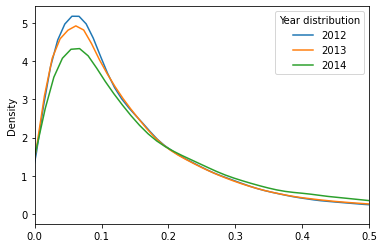

In [48]:
data.groupby('year')['KWhh'].plot(kind='kde')
xmin, xmax = plt. xlim(0,0.5)
plt.legend(['2012', '2013','2014'], title='Year distribution')


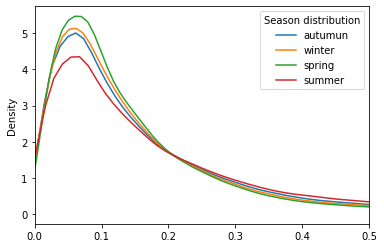

In [49]:
data.groupby('season')['KWhh'].plot(kind='kde')
xmin, xmax = plt. xlim(0,0.5)
plt.legend(['autumun', 'winter','spring','summer'], title='Season distribution')


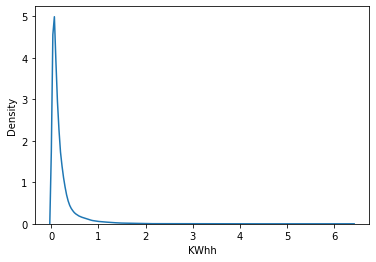

In [50]:
sns.kdeplot(data['KWhh'])
plt.show()

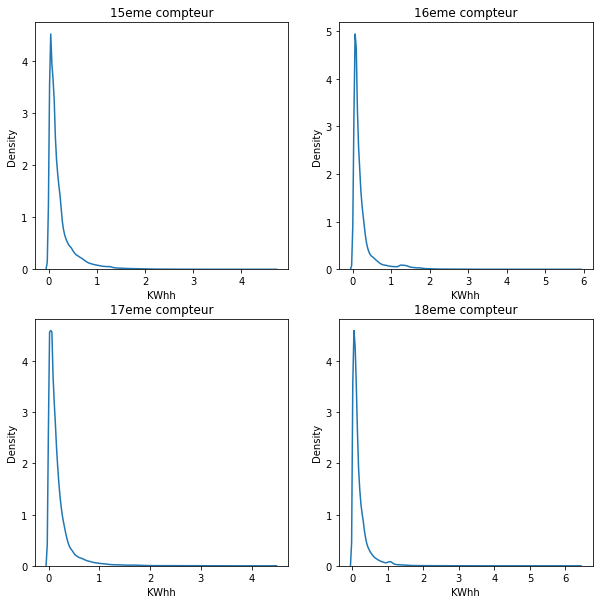

In [51]:
fig, ax = plt.subplots(2,2,figsize=(10,10))

sns.kdeplot(data[:1000000]['KWhh'],ax=ax[0,0]).set(title='15eme compteur')
sns.kdeplot(data[1000000:2000000]['KWhh'],ax=ax[0,1]).set(title='16eme compteur')
sns.kdeplot(data[2000000:3000000]['KWhh'],ax=ax[1,0]).set(title='17eme compteur')
sns.kdeplot(data[3000000:4000000]['KWhh'],ax=ax[1,1]).set(title='18eme compteur')
plt.show()

In [52]:
data.columns

Index(['LCLid', 'DateTime', 'KWhh', 'year', 'month', 'day', 'hour', 'minute',
       'season', 'season_encoded', 'period', 'period_enc'],
      dtype='object')

In [53]:
data['LCLid'].unique()

array(['MAC000515', 'MAC000516', 'MAC000517', 'MAC000518', 'MAC000519',
       'MAC000520', 'MAC000522', 'MAC000524', 'MAC000526', 'MAC000527',
       'MAC000528', 'MAC000530', 'MAC000531', 'MAC000532', 'MAC000533',
       'MAC000534', 'MAC000535', 'MAC000536', 'MAC000538', 'MAC000539',
       'MAC000540', 'MAC000541', 'MAC000542', 'MAC000543', 'MAC000545',
       'MAC000546', 'MAC000547', 'MAC000548', 'MAC000550', 'MAC000551',
       'MAC000552', 'MAC000553', 'MAC000554', 'MAC000555', 'MAC000556',
       'MAC000557', 'MAC000558', 'MAC000559', 'MAC000560', 'MAC000562',
       'MAC000563', 'MAC000564', 'MAC000566', 'MAC000567', 'MAC000568',
       'MAC000569', 'MAC000570', 'MAC000571', 'MAC000572', 'MAC000573',
       'MAC000574', 'MAC000575', 'MAC000576', 'MAC000577', 'MAC000578',
       'MAC000579', 'MAC000580', 'MAC000581', 'MAC000585', 'MAC000588',
       'MAC000589', 'MAC000591', 'MAC000592', 'MAC000594', 'MAC000596',
       'MAC000597', 'MAC000599', 'MAC000600', 'MAC000601', 'MAC0

In [66]:
df1=data.groupby(['LCLid','Weekday',]).agg({'KWhh':['mean']}).unstack()
df2=data.groupby(['LCLid','month',]).agg({'KWhh':['mean']}).unstack()
df3=data.groupby(['LCLid','season',]).agg({'KWhh':['mean']}).unstack()
df4=data.groupby(['LCLid','period',]).agg({'KWhh':['mean']}).unstack()
df5=data.groupby(['LCLid','year',]).agg({'KWhh':['mean']}).unstack()

In [67]:
df1.head()

KWhh                                                    \
               mean                                                     
Weekday      Friday    Monday  Saturday    Sunday  Thursday   Tuesday   
LCLid                                                                   
MAC000515  0.100547  0.098732  0.118636  0.103596  0.112954  0.110521   
MAC000516  0.139241  0.181759  0.154080  0.157030  0.182290  0.178225   
MAC000517  0.112473  0.108733  0.092129  0.101238  0.105331  0.107745   
MAC000518  0.138408  0.137671  0.143309  0.146756  0.138603  0.135056   
MAC000519  0.353762  0.384540  0.390895  0.403448  0.377142  0.382908   

                     
                     
Weekday   Wednesday  
LCLid                
MAC000515  0.096201  
MAC000516  0.174066  
MAC000517  0.110106  
MAC000518  0.137079  
MAC000519  0.379470

In [91]:
df1.columns

MultiIndex([('KWhh', 'mean',    'Friday'),
            ('KWhh', 'mean',    'Monday'),
            ('KWhh', 'mean',  'Saturday'),
            ('KWhh', 'mean',    'Sunday'),
            ('KWhh', 'mean',  'Thursday'),
            ('KWhh', 'mean',   'Tuesday'),
            ('KWhh', 'mean', 'Wednesday')],
           names=[None, None, 'Weekday'])

In [82]:
days=["Friday","Monday","Saturday","Sunday","Thursday","Tuesday","Wednesday"]

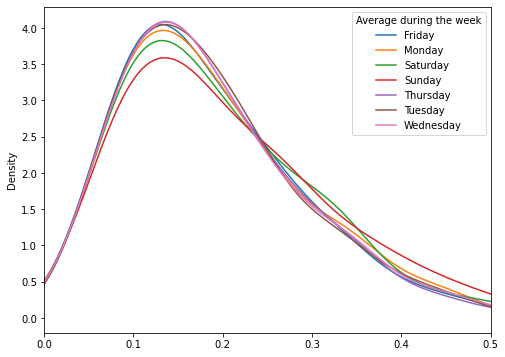

In [113]:
fig, ax = plt.subplots(figsize=(8,6))
df1.plot(kind='kde', ax=ax, label=days)
xmin, xmax = plt. xlim(0,0.5)
plt.legend(days,title='Average during the week')

In [68]:
df2.head()

KWhh                                                    \
               mean                                                     
month            1         2         3         4         5         6    
LCLid                                                                   
MAC000515  0.156003  0.124274  0.070564  0.060909  0.090751  0.080560   
MAC000516  0.198413  0.180552  0.190906  0.125793  0.180549  0.178692   
MAC000517  0.155185  0.176962  0.180731  0.152023  0.118397  0.069933   
MAC000518  0.157446  0.155721  0.128606  0.148281  0.154281  0.131960   
MAC000519  0.473876  0.425760  0.477851  0.437450  0.346557  0.315043   

                                                                       
                                                                       
month            7         8         9         10        11        12  
LCLid                                                                  
MAC000515  0.056973  0.082830  0.097339  0.109635  0.144501  0.130171  
MAC000516  0.174412  0.138995  0.158020  0.169601  0.158729  0.156263  
MAC000517  0.085155  0.071143  0.077164  0.071060  0.078010  0.117308  
MAC000518  0.122190  0.118458  0.115681  0.147716  0.160159  0.131146  
MAC000519  0.268444  0.256773  0.326015  0.356184  0.484409  0.457357

In [128]:
months=data['DateTime'].dt.month_name().unique()

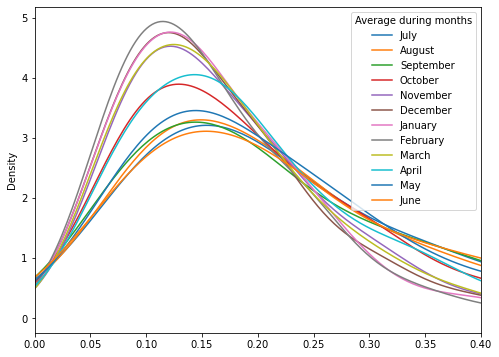

In [130]:
fig, ax = plt.subplots(figsize=(8,6))
df2.plot(kind='kde', ax=ax, label=days)
xmin, xmax = plt. xlim(0,0.4)
plt.legend(months,title='Average during months')

In [69]:
df3.head()

KWhh                              
               mean                              
season       autumn    spring    summer    winter
LCLid                                            
MAC000515  0.117077  0.076080  0.072973  0.127460
MAC000516  0.162199  0.153625  0.163874  0.180410
MAC000517  0.075364  0.134931  0.075531  0.150103
MAC000518  0.141257  0.151329  0.124118  0.144630
MAC000519  0.388510  0.391258  0.279319  0.457420

In [118]:
seasons=data['season'].unique()

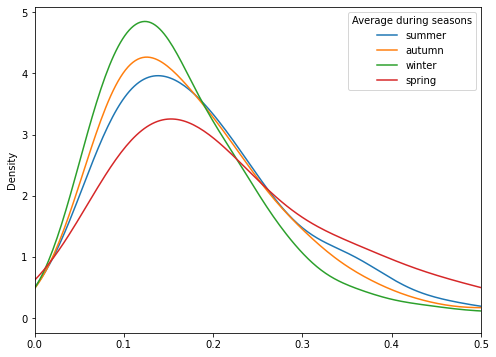

In [120]:
fig, ax = plt.subplots(figsize=(8,6))
df3.plot(kind='kde', ax=ax, label=days)
xmin, xmax = plt. xlim(0,0.5)
plt.legend(seasons,title='Average during seasons')

In [70]:
df4.head()

KWhh                                 
                   mean                                 
period    early_evening late_evening   morning     night
LCLid                                                   
MAC000515      0.171570     0.163865  0.069450  0.018528
MAC000516      0.200404     0.215514  0.157278  0.093539
MAC000517      0.147995     0.130554  0.103464  0.039557
MAC000518      0.146996     0.219154  0.128612  0.063313
MAC000519      0.370841     0.657176  0.270452  0.228028

In [121]:
periods=data['period'].unique()

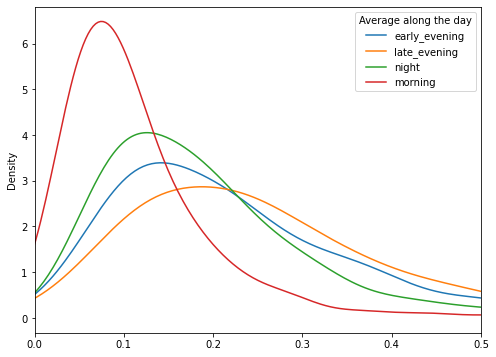

In [123]:
fig, ax = plt.subplots(figsize=(8,6))
df4.plot(kind='kde', ax=ax, label=days)
xmin, xmax = plt. xlim(0,0.5)
plt.legend(periods,title='Average along the day')

In [71]:
df5.head()

KWhh                    
               mean                    
year           2012      2013      2014
LCLid                                  
MAC000515  0.104828  0.103378  0.124805
MAC000516  0.163330  0.168230  0.173443
MAC000517  0.116797  0.095838  0.153409
MAC000518  0.128308  0.147377  0.144436
MAC000519  0.364165  0.389803  0.414799

In [124]:
years=data['year'].unique()

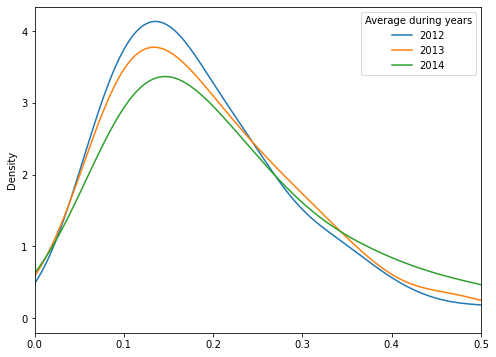

In [125]:
fig, ax = plt.subplots(figsize=(8,6))
df5.plot(kind='kde', ax=ax, label=days)
xmin, xmax = plt. xlim(0,0.5)
plt.legend(years,title='Average during years')

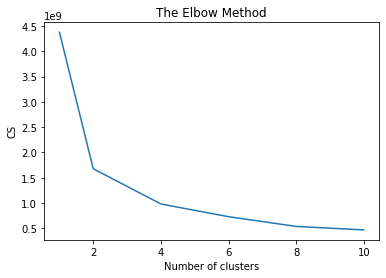

In [137]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [250]:
kmeans= KMeans(n_clusters = 4,init='k-means++', random_state = 42)

y_kmeans=kmeans.fit_predict(consumption)

In [251]:
kmeans.cluster_centers_

array([[3.13873371e+03, 8.77880184e-03, 1.67553456e+00, 1.06749311e-01,
        1.18365177e-01, 1.43571324e-01, 1.03228194e-01, 6.17685310e-02,
        9.59615560e-02, 1.06019441e-01, 1.20711640e-01, 1.01572388e-01,
        1.05103517e-01, 1.06051693e-01, 9.56722227e-02],
       [2.37155938e+04, 8.15000000e-02, 4.36924998e+00, 7.29861178e-01,
        7.76712160e-01, 9.11469808e-01, 6.87669593e-01, 5.43310487e-01,
        5.97697932e-01, 6.92697090e-01, 9.12892012e-01, 6.56357247e-01,
        6.76577879e-01, 7.52386991e-01, 8.24861655e-01],
       [1.16477115e+04, 3.27179487e-02, 3.25705128e+00, 3.61673766e-01,
        4.18041291e-01, 4.91614521e-01, 3.45474085e-01, 1.91342153e-01,
        2.88478684e-01, 3.59925857e-01, 4.43060383e-01, 3.30505116e-01,
        3.40373634e-01, 3.63523512e-01, 4.36952115e-01],
       [6.76469431e+03, 1.95113636e-02, 2.39423864e+00, 2.15764006e-01,
        2.46291601e-01, 2.87189839e-01, 2.07004428e-01, 1.22435696e-01,
        1.84164330e-01, 2.13025972e-0

In [252]:
kmeans.inertia_

1294167282.013934

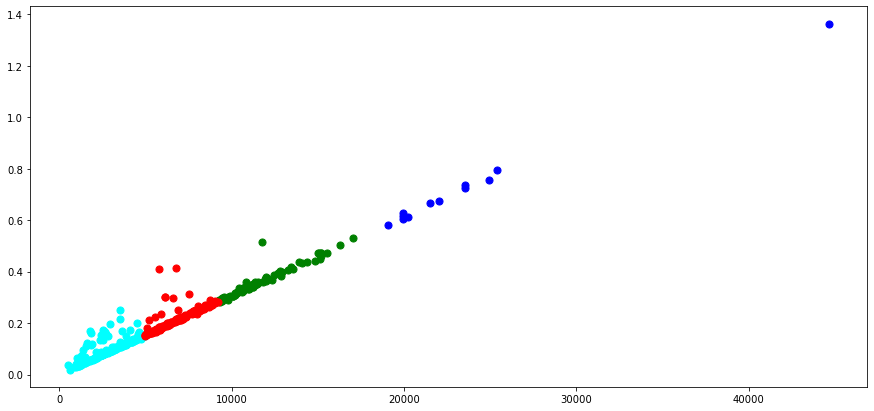

In [261]:
plt.figure(figsize=(15,7))
X='Total'
Y='Average'
df=consumption
plt.scatter(df[[X]][y_kmeans==0],df[[Y]][y_kmeans==0],color='cyan',label='Cluster 1',s=50)
plt.scatter(df[[X]][y_kmeans==1],df[[Y]][y_kmeans==1],color='blue',label='Cluster 2',s=50)
plt.scatter(df[[X]][y_kmeans==2],df[[Y]][y_kmeans==2],color='green',label='Cluster 3',s=50)
plt.scatter(df[[X]][y_kmeans==3],df[[Y]][y_kmeans==3],color='red',label='Cluster 4',s=50)